## Import Libraries & Load Dataset

In [1]:
import os
import glob
import pandas as pd
import numpy as np
from deepface import DeepFace
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [2]:
X,Y = [],[]
for index,paths in enumerate(os.listdir("Actor")):
    paths = glob.glob(os.path.join(f"Actor/{paths}/*"))
    for path in paths:
        embedding = DeepFace.represent(img_path = path, model_name = 'ArcFace')
        X.append(embedding)
        Y.append(index)

In [3]:
df1 = pd.DataFrame(X)
df2 = pd.DataFrame(Y,columns=["target"])

In [4]:
feature_df = pd.concat([df1,df2],axis=1)
feature_df.to_csv('featureact.csv', index=False)
feature_df.head()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,target
0,0.068913,0.351612,0.158816,-0.049700,-0.006458,0.099241,0.286416,-0.174178,0.484864,0.192988,...,0.141474,0.208830,-0.121869,0.215515,-0.191955,0.023360,0.198800,0.556806,0.301049,0
1,0.040682,0.257558,0.104557,0.194518,0.226393,0.034214,0.275209,-0.151838,0.556266,0.148203,...,0.182706,0.012894,-0.040099,0.294579,-0.280246,-0.080286,-0.304367,0.396919,0.217276,0
2,0.104939,0.386380,0.106487,-0.025087,0.143690,-0.064570,0.303678,-0.211972,0.271065,0.256697,...,0.336132,0.107602,0.003435,0.037728,-0.242118,-0.038507,-0.023617,0.457861,0.303925,0
3,0.184194,0.086012,0.076670,0.252577,0.201675,-0.001238,0.216037,-0.113079,0.511967,0.195856,...,0.364943,0.193744,-0.072611,0.135687,-0.303817,-0.061088,0.143668,0.442037,0.543001,0
4,0.029415,0.303481,0.133968,0.098860,0.214055,0.004312,0.243348,-0.209635,0.554337,0.171607,...,0.153166,0.060538,0.006612,0.284226,-0.292747,-0.044281,-0.265390,0.394750,0.246299,0


In [5]:
X_train , X_test, Y_train , Y_test = train_test_split(X,Y,test_size=0.3)

# Model
### Multi Layer Perceptron

In [6]:
model = Sequential()
model.add(Dense(128,activation="relu",input_shape=(512,)))
model.add(Dense(2,activation="softmax"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
Total params: 65,922
Trainable params: 65,922
Non-trainable params: 0
_________________________________________________________________


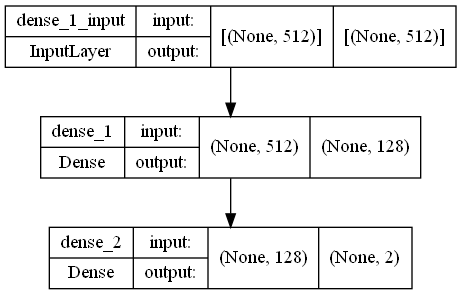

In [8]:
plot_model(model,show_shapes=True)

In [9]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
checkpoint = ModelCheckpoint("model.h5",monitor="val_accuracy",mode="max",save_best_only=True)

In [10]:
history = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=20,batch_size=25,callbacks=[checkpoint])

Epoch 1/20
3/3 [==============================] - 0s 100ms/step - loss: 0.5627 - accuracy: 0.8214 - val_loss: 0.3275 - val_accuracy: 1.0000
Epoch 2/20
3/3 [==============================] - 0s 22ms/step - loss: 0.2636 - accuracy: 1.0000 - val_loss: 0.1638 - val_accuracy: 1.0000
Epoch 3/20
3/3 [==============================] - 0s 20ms/step - loss: 0.1210 - accuracy: 1.0000 - val_loss: 0.0844 - val_accuracy: 1.0000
Epoch 4/20
3/3 [==============================] - 0s 22ms/step - loss: 0.0584 - accuracy: 1.0000 - val_loss: 0.0461 - val_accuracy: 1.0000
Epoch 5/20
3/3 [==============================] - 0s 23ms/step - loss: 0.0297 - accuracy: 1.0000 - val_loss: 0.0274 - val_accuracy: 1.0000
Epoch 6/20
3/3 [==============================] - 0s 25ms/step - loss: 0.0159 - accuracy: 1.0000 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 0s 25ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 8/20
3/3 [==========

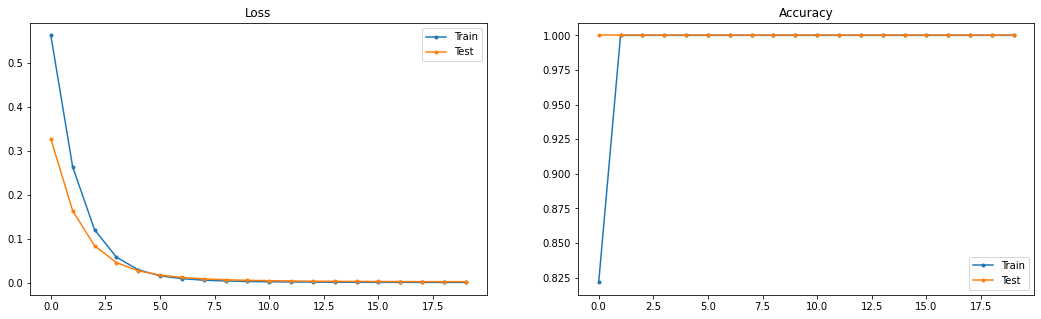

In [11]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(18,5))
ax1.set_title("Loss")
ax2.set_title("Accuracy")
ax1.plot(history.history["loss"],label="Train",marker=".")
ax1.plot(history.history["val_loss"],label="Test",marker=".")
ax2.plot(history.history["accuracy"],label="Train",marker=".")
ax2.plot(history.history["val_accuracy"],label="Test",marker=".")
ax1.legend()
ax2.legend()
plt.show()

In [12]:
embedding = DeepFace.represent(img_path = "Actor/parsa_piroozfar/12.jpg", model_name = 'ArcFace')
np.argmax(model.predict([embedding]))

1